<a href="https://colab.research.google.com/github/Jruz9/Week3-making-money-with-machine-learning/blob/master/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import sklearn as sk
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import scale # normalization library
import random

In [3]:
df_transaction= pd.read_csv('train_transaction.csv')  # reads the training  transaction datasets
df_identity=pd.read_csv('train_identity.csv') # reads the training identity dataset
df_transaction.head() #Lets me see the top part of the transaction training dataset

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,50.0,1758.0,925.0,0.0,354.0,0.0,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df_transaction.shape # get the shape of the transaction training datasets.

(590540, 394)

In [5]:
df_identity.head() # Lets me see the top of the datasets from the identity training datasets

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [6]:
df_identity.shape #Get the shape of the dataset of the identity training dataset

(144233, 41)

In [7]:
df_train=pd.merge(df_transaction,df_identity,on="TransactionID",how="left") # merges both training datasets
df_train.shape    #Gets the shape of the merged dataset

(590540, 434)

In [8]:
df_test_transaction=pd.read_csv('test_transaction.csv') #reads the test transaction datasets
df_test_identity=pd.read_csv('test_identity.csv')     #reads the test identity datasets
print (df_test_transaction.shape)                     # Prints the shape of the test tranaction dataset
print (df_test_identity.shape)                        # Prints the shape of the test identity dataset

(420741, 393)
(141907, 41)


In [9]:
df_test = pd.merge(df_test_transaction, df_test_identity, on = 'TransactionID', how = 'left') #merge both test datsets
df_test.shape   #Gets the shape of both datasets merged

(420741, 433)

In [10]:
fraud_percentage = (len(df_train[df_train['isFraud'] == 1]) / len(df_train)) * 100 #calcuates the frauds percentage in the datasets by defining the frauds to 1 and dividing by the other (non frauds)
print('Fraud = ', fraud_percentage, '%')  # prints the fraud percentage

Fraud =  3.4990009144173126 %


# Data Preprocessing

In [0]:
def visualize(X, Y, color): #fuction to vizualize the data to show the amount of nans there are
  plt.figure(figsize = (100,50))      # defines the size of the graph
  sns.barplot(x = X, 
              y = Y,
              palette = color)      #Defines the parameters for the graphs
  plt.title('% NANs per Column')    # gives the title of the graph
  plt.xticks(rotation = 90)         # Rotates the bars 90 degress on the x axis

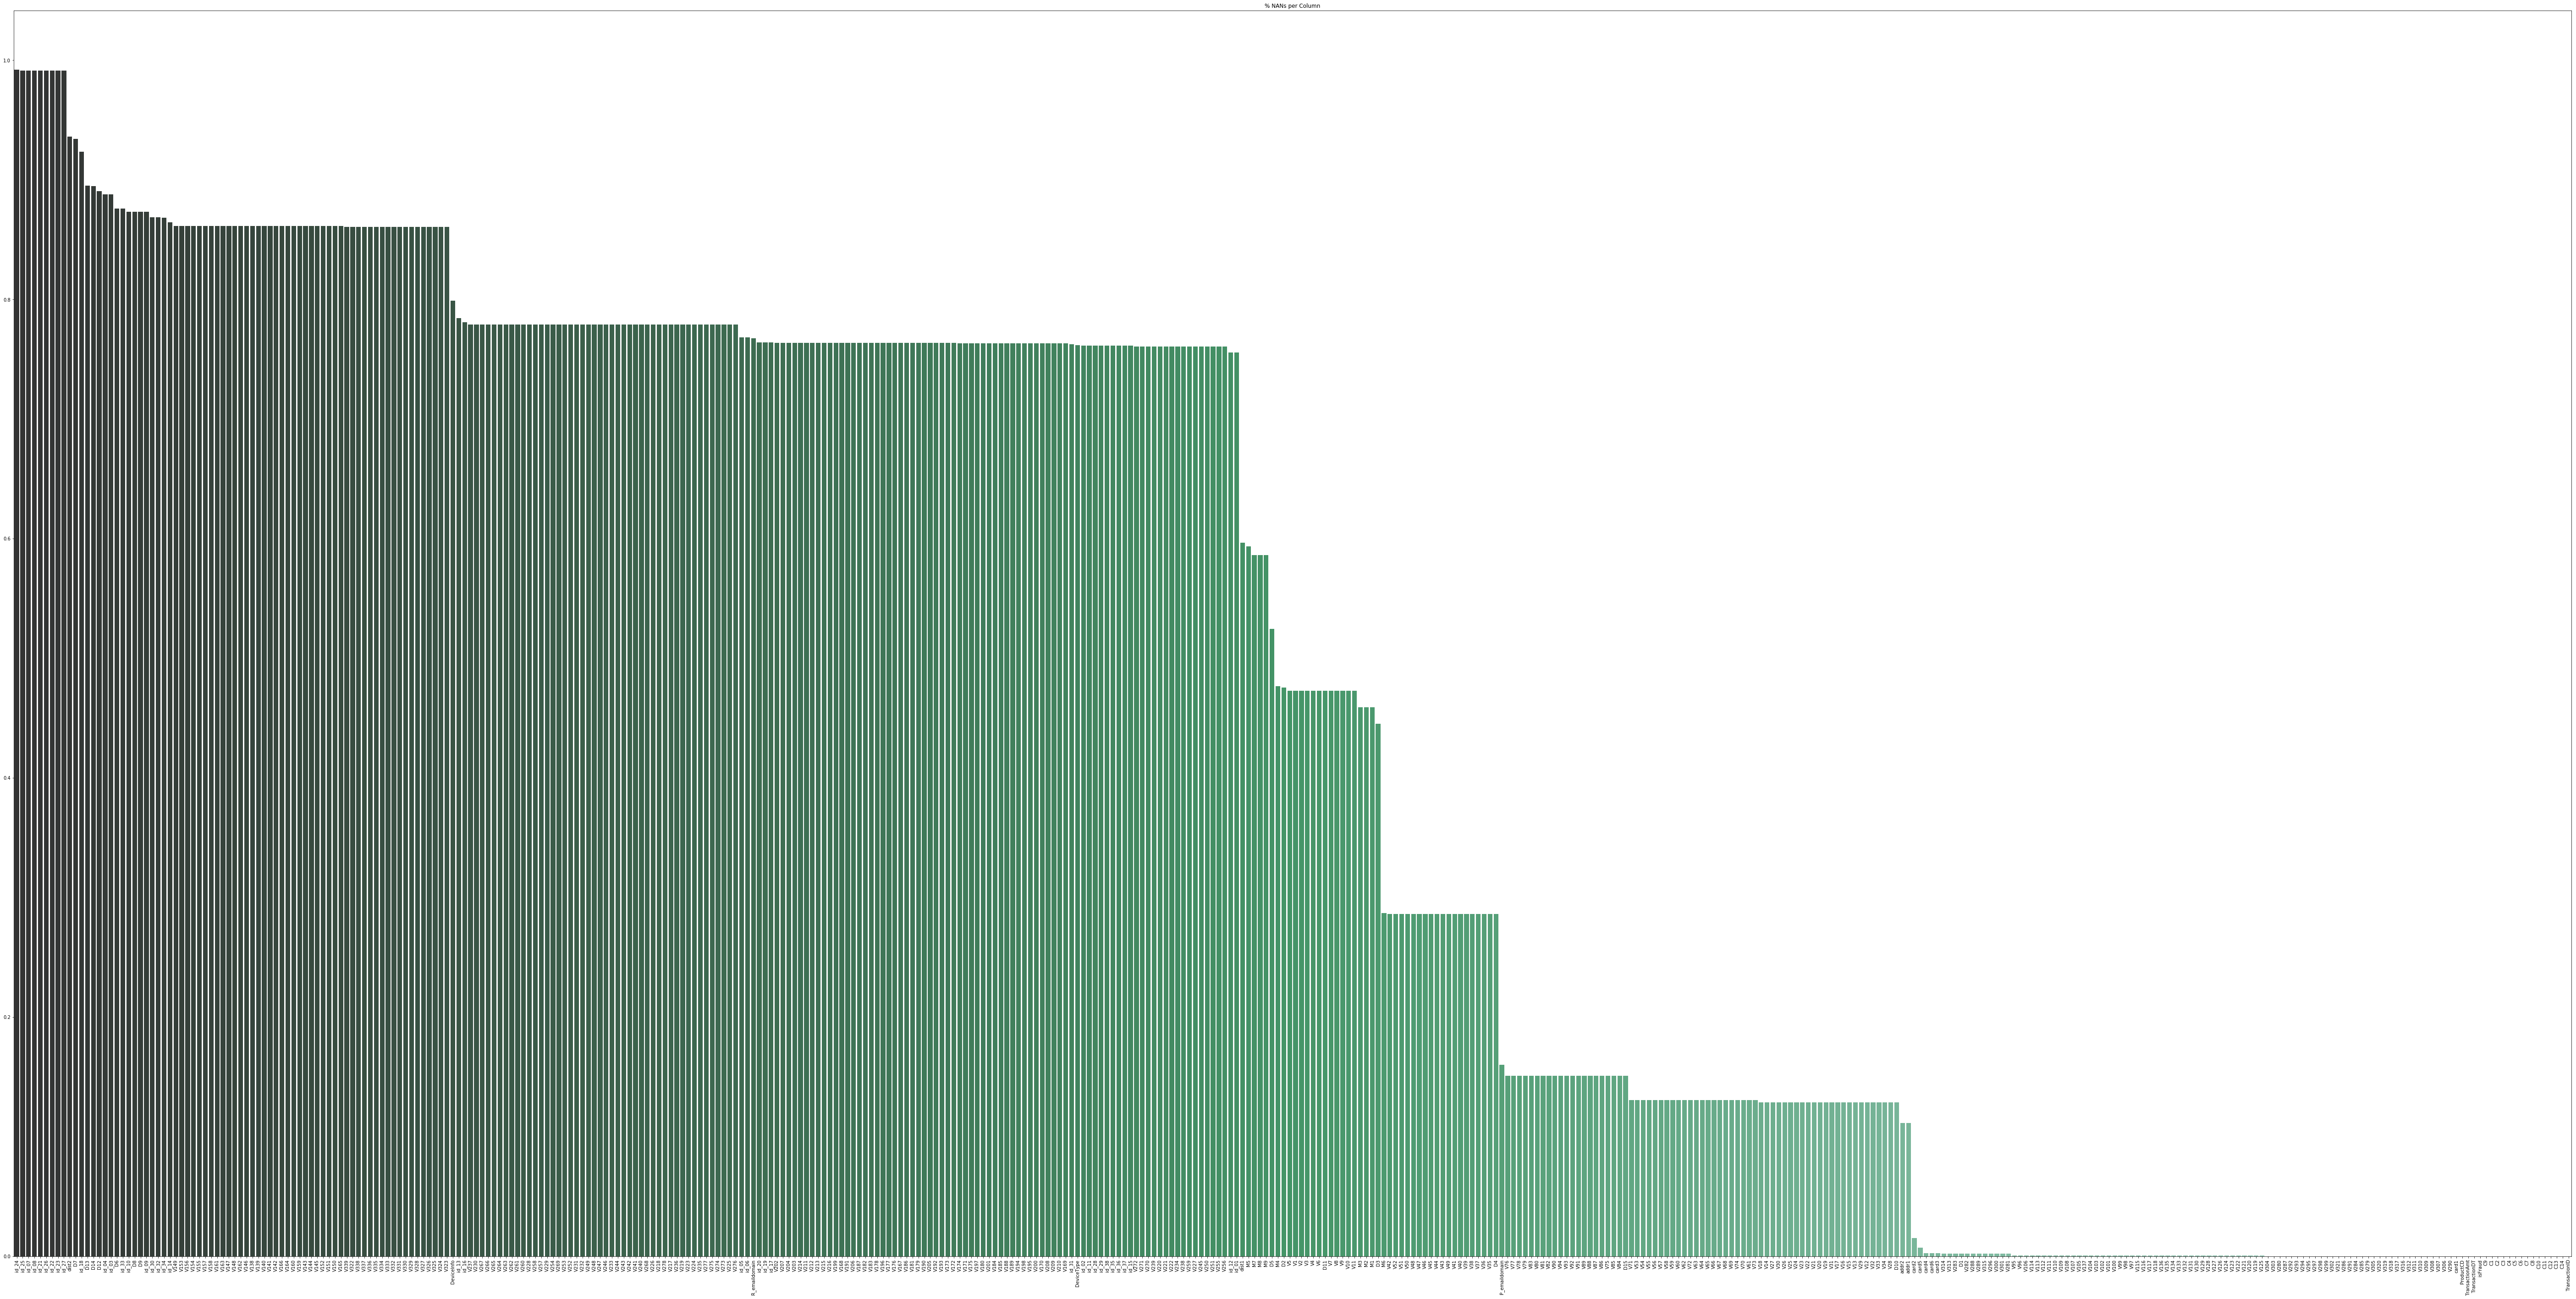

In [12]:
#Visualizing NANs % per Column
X = df_train.isnull().sum().sort_values(ascending = False).index #detects missing values for each column of the dataset
Y = df_train.isnull().sum().sort_values(ascending = False)/len(df_train)  #defines a range between 0 and 1
color = "BuGn_d"      # defines the color used  
visualize(X, Y, color)    #prints the graph using the parameters defined

In [0]:
df_cols_nans_count = df_train.isnull().sum().sort_values(ascending = False)   # counts the number of nan's per column
df_cols_nans_per = df_cols_nans_count/len(df_train)                           # calculate the percentage of nan's per column
df_cols_nans = pd.DataFrame({"nans_count" : df_cols_nans_count, "nans_%" : df_cols_nans_per}) #creates a dataframe of the amount of nan and percentage of nan per column

In [14]:
df_cols_nans #prints a dataframe of the results

,nans_count,nans_%
id_24,585793,0.991962
id_25,585408,0.991310
id_07,585385,0.991271
id_08,585385,0.991271
id_21,585381,0.991264
id_26,585377,0.991257
id_22,585371,0.991247
id_23,585371,0.991247
id_27,585371,0.991247
dist2,552913,0.936284


In [15]:
cols_drop_range = np.array([0.05, 0.10, 0.15, 0.20, 0.35, 0.45, 0.50, 0.70]) # an array of percentage 
for col in range(len(cols_drop_range)):   
  remaining_cols = df_cols_nans[df_cols_nans['nans_%'] <= cols_drop_range[col]] # detects the percentage of the columns and only pass the parts that are lower that specied array
  print('For using ', cols_drop_range[col], 'as a limiter we are left with ',remaining_cols.shape[0]/df_train.shape[1],'% of columns.') #prings the percentage of columns left using the limiters values

For using  0.05 as a limiter we are left with  0.25806451612903225 % of columns.
For using  0.1 as a limiter we are left with  0.25806451612903225 % of columns.
For using  0.15 as a limiter we are left with  0.3686635944700461 % of columns.
For using  0.2 as a limiter we are left with  0.41935483870967744 % of columns.
For using  0.35 as a limiter we are left with  0.46543778801843316 % of columns.
For using  0.45 as a limiter we are left with  0.46774193548387094 % of columns.
For using  0.5 as a limiter we are left with  0.5069124423963134 % of columns.
For using  0.7 as a limiter we are left with  0.5207373271889401 % of columns.


In [16]:
limiter = 0.2   #limiter value
discarded_cols = df_cols_nans[df_cols_nans['nans_%'] > limiter].index #Discards columns that are not higher than the limiter value
df_train = df_train.drop(columns = discarded_cols)    #Drops the columns from discarded_cols
df_train.shape  #prints the new shape

(590540, 182)

# Handling Cagagorical data

In [0]:
def encoding_categoricals(df):    #
  categorical_features = df.select_dtypes(include=[object]) #returns a subset of the libary
  encoded_categorical_features = pd.get_dummies(categorical_features) # convert categorical data into dummy data
  df = df.drop(columns = categorical_features)  #Drops the columns in categorical_features
  df = pd.concat([df, encoded_categorical_features], axis = 1)  #concatenate the data
  return df

In [0]:
def fill_nans(df):
  df = df.fillna(df.mode())   #fills the colum with na using the mode
  df = df.dropna()            #Removes the missing values
  return df

In [19]:
df_train = encoding_categoricals(df_train)    #uses the encoding_categoricals fuction with df_train
df_train = fill_nans(df_train)    #uses the fill_nans function with df_train
df_train.shape  #get the shape of df_train

(423711, 250)

# Spliting training datasets into target and features variable.

In [0]:
X_train = df_train[df_train.columns.difference(['isFraud'])] #excludes colums that are faurd
y_train = df_train['isFraud'] #include the isfraud from the dataset

In [21]:
print('X train : ', X_train.shape, ' Y train : ', y_train.shape)    #prints the shape of the x and y arrays

X train :  (423711, 249)  Y train :  (423711,)


# Test Data

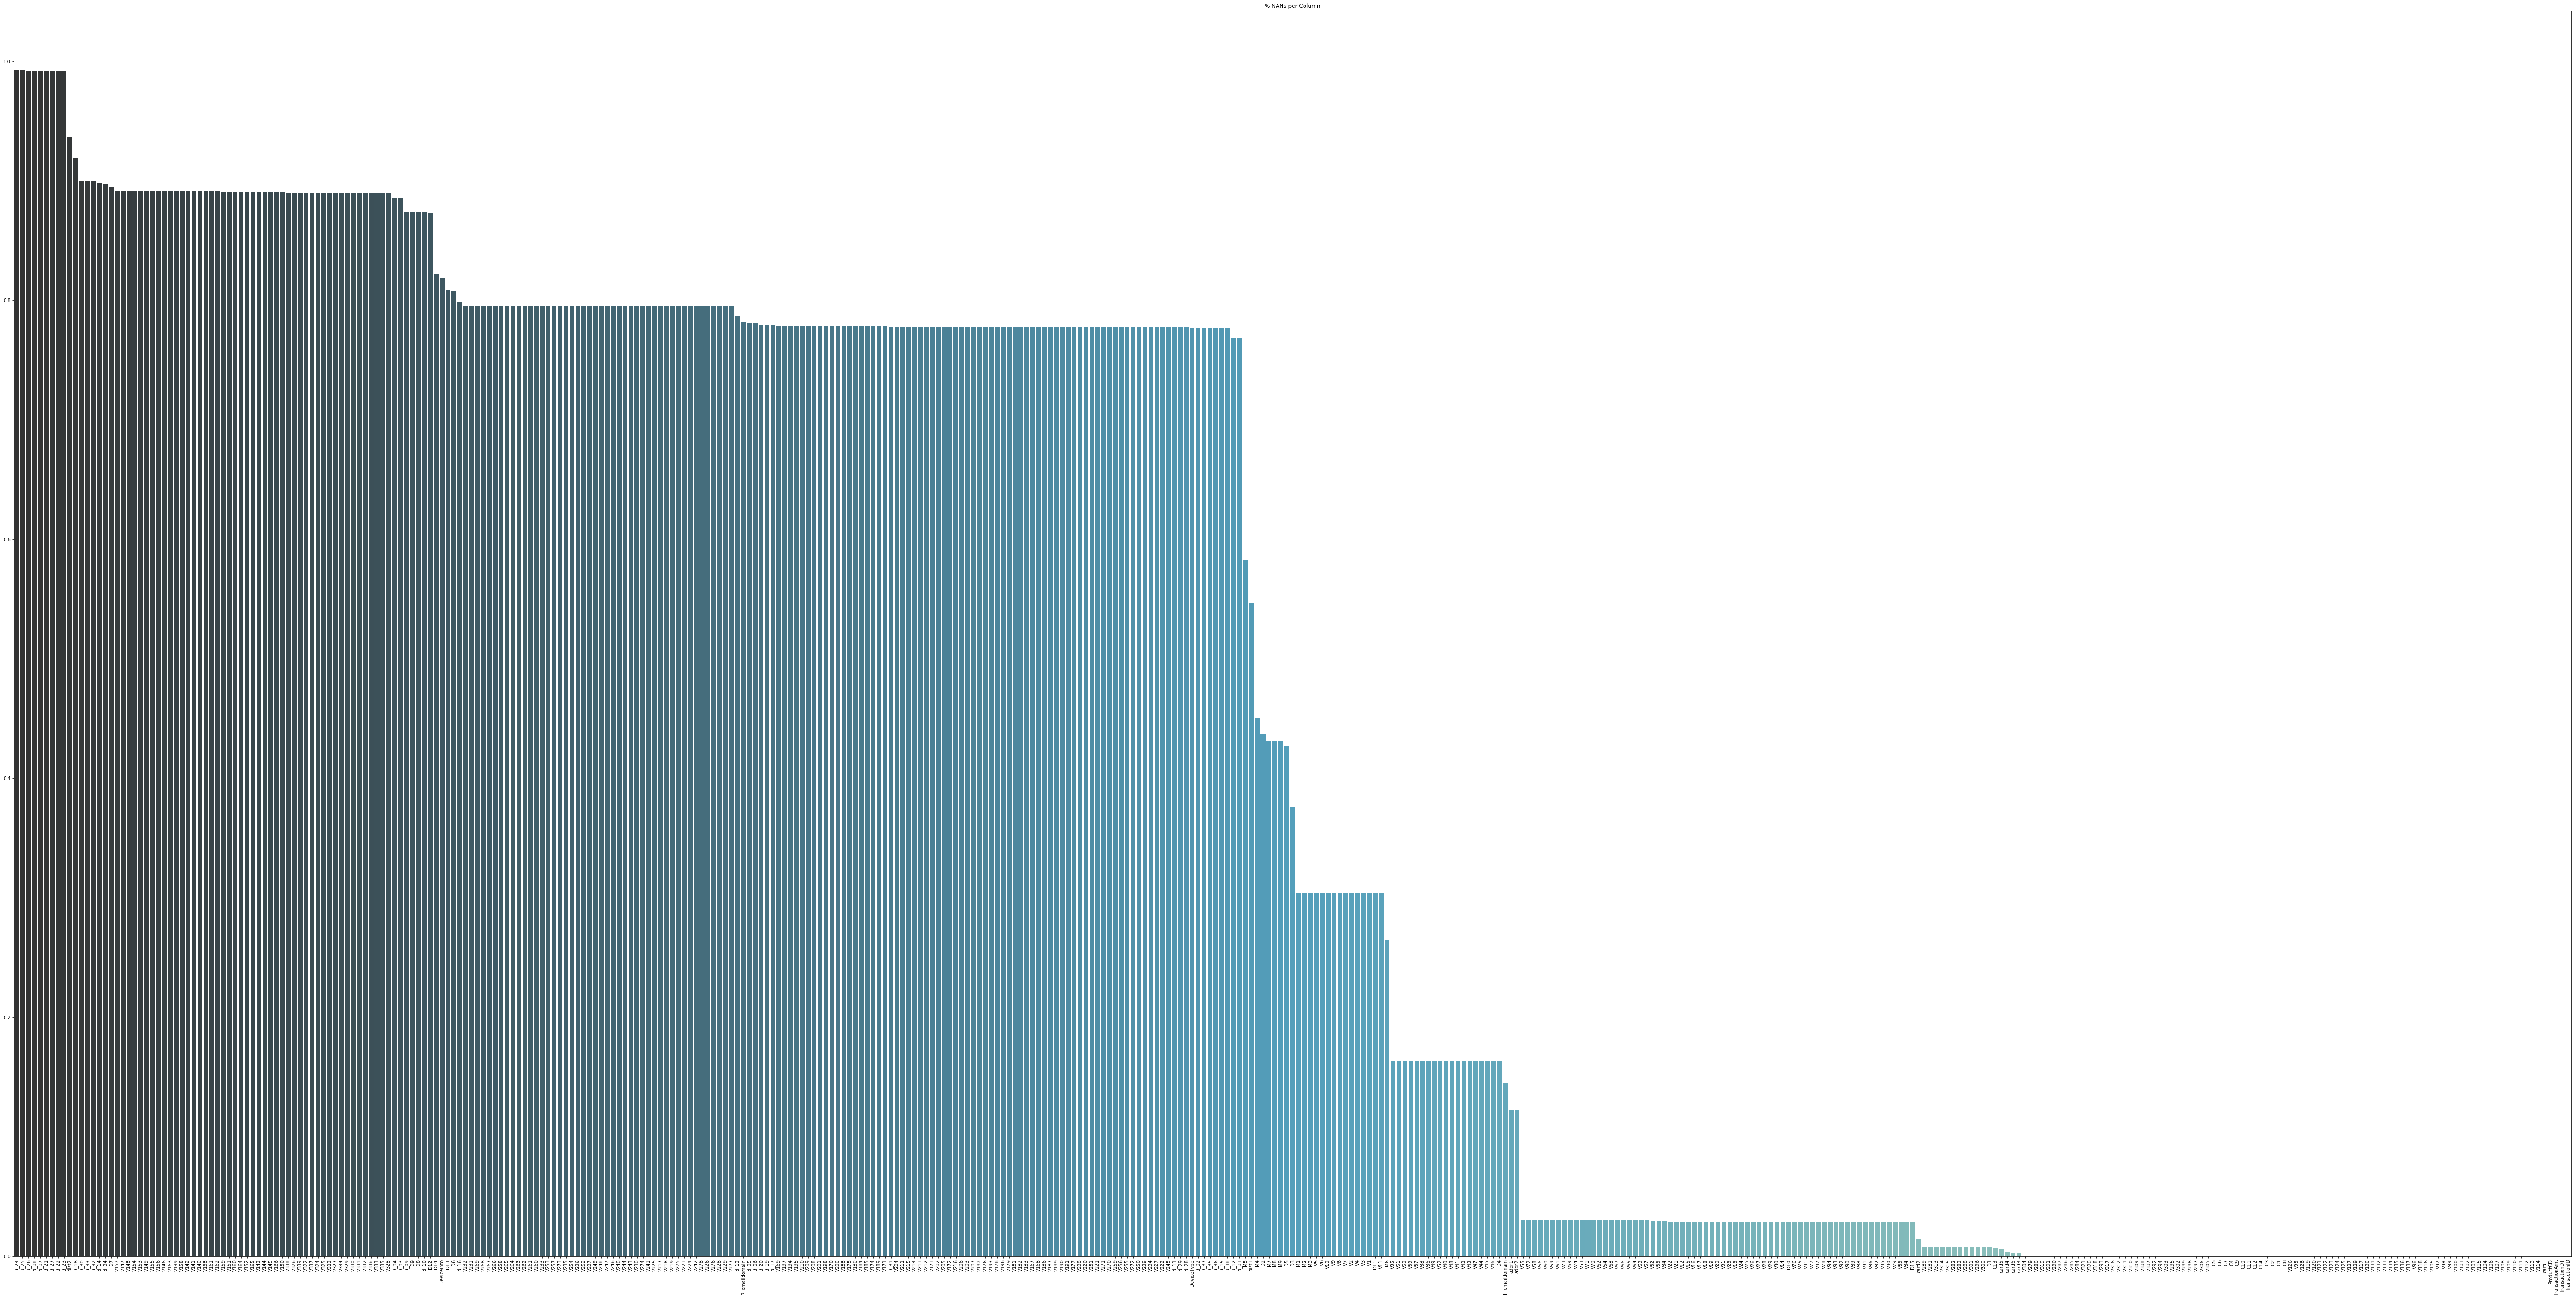

In [22]:
#Visualizing NANs % per Column
X = df_test.isnull().sum().sort_values(ascending = False).index   #detects the missing values per column in the array
Y = df_test.isnull().sum().sort_values(ascending = False)/len(df_test)      #Give a range using the data from x  for the y axis
color = "GnBu_d"  #defines the color
visualize(X, Y, color)    #uses the vizulaize function to build a graph

In [23]:
#discarding the same columns as in train data
df_test = df_test.drop(columns = discarded_cols)
df_test.shape

(420741, 181)

In [24]:
#Encoding categorical features and filling remaining nans with mode
df_test = encoding_categoricals(df_test)
df_test = fill_nans(df_test)
df_test.shape

(345057, 248)

#Building Model

In [0]:
from sklearn.linear_model import LogisticRegression # imports logistic regression

In [26]:
regressor = LogisticRegression(solver = 'lbfgs') #defines logistic regession 
regressor.fit(X_train, y_train)                   #fits the data for logsistic regression

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
regressor.score(X_train, y_train)     #Gives a prediction score for the logistic regression

0.9795922220570152

In [0]:
y_train_pred = regressor.predict(X_train)

In [29]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(regressor, X_train, y_train[:np.shape(X_train)[0]], cv=3, verbose=3)  #cross validaition
score.mean()  #gives the mean of the score

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .................................... , score=0.979, total=  21.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   22.0s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[CV] .................................... , score=0.980, total=  23.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   45.7s remaining:    0.0s


[CV] .................................... , score=0.979, total=   9.5s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   55.2s finished


0.9792759687617267